## Group 2: Mobile Banking Prdiction Challenge
#### Group Members
- Anen Isaac
-Godson Ntungi
-Habiba Machela

### Feature Selection and Engineering

In [1]:
# import important modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.model_selection import train_test_split

In [2]:
url = 'https://raw.githubusercontent.com/21anen/Data-Science/main/Train.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,...,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [4]:
# print shape 
print('train data shape :', data.shape)

train data shape : (108446, 42)


In [5]:
#show list of columns 
list(data.columns)  

['ID',
 'country_code',
 'region',
 'age',
 'FQ1',
 'FQ2',
 'FQ3',
 'FQ4',
 'FQ5',
 'FQ6',
 'FQ7',
 'FQ8',
 'FQ9',
 'FQ10',
 'FQ11',
 'FQ12',
 'FQ13',
 'FQ14',
 'FQ15',
 'FQ16',
 'FQ17',
 'FQ18',
 'FQ19',
 'FQ20',
 'FQ21',
 'FQ22',
 'FQ23',
 'FQ24',
 'FQ35',
 'FQ36',
 'FQ25',
 'FQ26',
 'FQ27',
 'FQ28',
 'FQ29',
 'FQ30',
 'FQ31',
 'FQ32',
 'FQ33',
 'FQ34',
 'FQ37',
 'Target']

In [6]:
## show Some information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

**Checking for Missing Values**

In [7]:
# Check for missing values
print('missing values:', data.isnull().sum())              

missing values: ID                   0
country_code         0
region               0
age                322
FQ1                  0
FQ2              59322
FQ3              62228
FQ4                  0
FQ5              87261
FQ6              47787
FQ7              47826
FQ8                  0
FQ9                  0
FQ10                 0
FQ11             24570
FQ12                 0
FQ13                 0
FQ14                 0
FQ15                 0
FQ16                 0
FQ17             97099
FQ18                 0
FQ19             47407
FQ20             24679
FQ21             24635
FQ22                 0
FQ23                 0
FQ24             70014
FQ35             82557
FQ36             96963
FQ25                 0
FQ26                 0
FQ27            105246
FQ28            106940
FQ29             24534
FQ30            106331
FQ31            107577
FQ32             47650
FQ33                 2
FQ34             31794
FQ37                 0
Target               0
dtype: int64


**Removing columns with more than 70% missing values**

In [8]:
#drop columns that have 70% or more of data missing
data_null = data.isnull().sum() / len(data)
missing_features = data_null[data_null > 0.70].index
print('dropped features: ',missing_features)
data.drop(missing_features, axis=1, inplace=True)

dropped features:  Index(['FQ5', 'FQ17', 'FQ35', 'FQ36', 'FQ27', 'FQ28', 'FQ30', 'FQ31'], dtype='object')


In [9]:
# Check again for missing values
print('missing values:', data.isnull().sum()) 

missing values: ID                  0
country_code        0
region              0
age               322
FQ1                 0
FQ2             59322
FQ3             62228
FQ4                 0
FQ6             47787
FQ7             47826
FQ8                 0
FQ9                 0
FQ10                0
FQ11            24570
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ18                0
FQ19            47407
FQ20            24679
FQ21            24635
FQ22                0
FQ23                0
FQ24            70014
FQ25                0
FQ26                0
FQ29            24534
FQ32            47650
FQ33                2
FQ34            31794
FQ37                0
Target              0
dtype: int64


In [10]:
data['region'].unique()

array([ 6,  7,  3,  0,  4,  2,  1,  5, -1])

In [11]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

**Filling Missing values**

In [12]:
## Filling missing values
#for numerical data we use mean
#for categorical data we use mode(value of the highest frequency)
data['age'] = data['age'].fillna(data['age'].mean())
data['FQ2'] = data['FQ2'].fillna(data['FQ2'].mode()[0])
data['FQ3'] = data['FQ3'].fillna(data['FQ3'].mode()[0])
data['FQ6'] = data['FQ6'].fillna(data['FQ6'].mode()[0])
data['FQ7'] = data['FQ7'].fillna(data['FQ7'].mode()[0])
data['FQ11'] = data['FQ11'].fillna(data['FQ11'].mode()[0])
data['FQ19'] = data['FQ19'].fillna(data['FQ19'].mode()[0])
data['FQ20'] = data['FQ20'].fillna(data['FQ20'].mode()[0])
data['FQ21'] = data['FQ21'].fillna(data['FQ21'].mode()[0])
data['FQ24'] = data['FQ24'].fillna(data['FQ24'].mode()[0])
data['FQ29'] = data['FQ29'].fillna(data['FQ29'].mode()[0])
data['FQ32'] = data['FQ32'].fillna(data['FQ32'].mode()[0])
data['FQ33'] = data['FQ33'].fillna(data['FQ33'].mode()[0])
data['FQ34'] = data['FQ34'].fillna(data['FQ34'].mode()[0])

print('missing values:', data.isnull().sum())

missing values: ID              0
country_code    0
region          0
age             0
FQ1             0
FQ2             0
FQ3             0
FQ4             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ24            0
FQ25            0
FQ26            0
FQ29            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
Target          0
dtype: int64


In [13]:
data['FQ2'].mode()

0    1.0
dtype: float64

In [14]:
#remove ID feature 

data = data.drop('ID', axis=1)

data.shape 

(108446, 33)

In [15]:
#show first five rows
data.head()

,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,...,FQ23,FQ24,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,1,6,35.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,2,2,1.0,2.0,1.0,1.0,0,0
1,32,7,70.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,1,1,2.0,2.0,1.0,2.0,0,0
2,71,7,22.0,2,1.0,1.0,2,1.0,1.0,2,...,2,2.0,2,1,2.0,2.0,2.0,1.0,1,0
3,48,3,27.0,1,1.0,1.0,2,2.0,1.0,2,...,2,2.0,2,2,2.0,2.0,1.0,1.0,1,0
4,25,0,79.0,2,1.0,1.0,2,1.0,1.0,2,...,1,2.0,2,2,2.0,2.0,1.0,1.0,1,0


In [16]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

**Scaling numerical Features**

In [17]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))


data['age'] = scaler.fit_transform(data['age'].values.reshape(-1,1))


In [18]:
import joblib

In [19]:
joblib.dump(scaler,'minMaxscaler.pkl')

['minMaxscaler.pkl']

In [25]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['country_code','region','FQ1','FQ2','FQ3','FQ4','FQ6','FQ7','FQ8','FQ9','FQ10','FQ11','FQ12','FQ13','FQ14','FQ15','FQ16','FQ18','FQ19','FQ20','FQ21','FQ22','FQ23','FQ24','FQ25','FQ26','FQ29','FQ32','FQ33','FQ34','FQ37']


In [26]:
oneHot = OneHotEncoder(categories=categorical_features)

In [27]:
data= oneHot.fit_transform(data[categorical_features])

In [33]:
print(data)

  (0, 1)	1.0
  (0, 151)	1.0
  (0, 154)	1.0
  (0, 157)	1.0
  (0, 161)	1.0
  (0, 166)	1.0
  (0, 169)	1.0
  (0, 173)	1.0
  (0, 178)	1.0
  (0, 181)	1.0
  (0, 185)	1.0
  (0, 190)	1.0
  (0, 194)	1.0
  (0, 198)	1.0
  (0, 202)	1.0
  (0, 206)	1.0
  (0, 210)	1.0
  (0, 214)	1.0
  (0, 220)	1.0
  (0, 226)	1.0
  (0, 229)	1.0
  (0, 233)	1.0
  (0, 238)	1.0
  (0, 242)	1.0
  (0, 246)	1.0
  :	:
  (108445, 169)	1.0
  (108445, 173)	1.0
  (108445, 178)	1.0
  (108445, 182)	1.0
  (108445, 186)	1.0
  (108445, 189)	1.0
  (108445, 194)	1.0
  (108445, 198)	1.0
  (108445, 202)	1.0
  (108445, 205)	1.0
  (108445, 210)	1.0
  (108445, 214)	1.0
  (108445, 218)	1.0
  (108445, 226)	1.0
  (108445, 230)	1.0
  (108445, 233)	1.0
  (108445, 238)	1.0
  (108445, 242)	1.0
  (108445, 246)	1.0
  (108445, 250)	1.0
  (108445, 253)	1.0
  (108445, 258)	1.0
  (108445, 261)	1.0
  (108445, 265)	1.0
  (108445, 270)	1.0


In [36]:
print(oneHot.get_feature_names_out())

['country_code_0' 'country_code_1' 'country_code_2' 'country_code_3'
 'country_code_4' 'country_code_5' 'country_code_6' 'country_code_7'
 'country_code_8' 'country_code_9' 'country_code_10' 'country_code_11'
 'country_code_12' 'country_code_13' 'country_code_14' 'country_code_15'
 'country_code_16' 'country_code_17' 'country_code_18' 'country_code_19'
 'country_code_20' 'country_code_21' 'country_code_22' 'country_code_23'
 'country_code_24' 'country_code_25' 'country_code_26' 'country_code_27'
 'country_code_28' 'country_code_29' 'country_code_30' 'country_code_31'
 'country_code_32' 'country_code_33' 'country_code_34' 'country_code_35'
 'country_code_36' 'country_code_37' 'country_code_38' 'country_code_39'
 'country_code_40' 'country_code_41' 'country_code_42' 'country_code_43'
 'country_code_44' 'country_code_45' 'country_code_46' 'country_code_47'
 'country_code_48' 'country_code_49' 'country_code_50' 'country_code_51'
 'country_code_52' 'country_code_53' 'country_code_54' 'count

In [40]:
joblib.dump(oneHot,'oneHotEncoder.pkl')

['oneHotEncoder.pkl']

In [38]:
data1=pd.DataFrame(data.toarray(),columns=oneHot.get_feature_names_out())

In [39]:
data1

,country_code_0,country_code_1,country_code_2,country_code_3,country_code_4,country_code_5,country_code_6,country_code_7,country_code_8,country_code_9,...,FQ33_1.0,FQ33_2.0,FQ33_3.0,FQ33_4.0,FQ34_1.0,FQ34_2.0,FQ34_3.0,FQ34_4.0,FQ37_0,FQ37_1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
108442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
108443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
108444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Encoding categorical features**

In [ ]:
# convert categorical features to numerical features

categorical_features = ['country_code','region','FQ1','FQ2','FQ3','FQ4','FQ6','FQ7','FQ8','FQ9','FQ10','FQ11','FQ12','FQ13','FQ14','FQ15','FQ16','FQ18','FQ19','FQ20','FQ21','FQ22','FQ23','FQ24','FQ25','FQ26','FQ29','FQ32','FQ33','FQ34','FQ37']

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

(108446, 273)

In [ ]:
features = data.drop('Target', axis=1)
target=data['Target']

In [ ]:
features.columns

Index(['age', 'country_code_0', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7', 'country_code_8',
       ...
       'FQ33_1.0', 'FQ33_2.0', 'FQ33_3.0', 'FQ33_4.0', 'FQ34_1.0', 'FQ34_2.0',
       'FQ34_3.0', 'FQ34_4.0', 'FQ37_0', 'FQ37_1'],
      dtype='object', length=272)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

**Finding the SelectKBest score for each feature**

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)

fit = bestfeatures.fit(features,target)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(features.columns)

featureScores = pd.concat([columns,scores],axis=1)

featureScores.columns = ['Features','score'] 

#print 20 best features 
print(featureScores.nlargest(20,'score'))  

             Features     score
257          FQ29_4.0  8.329539
33    country_code_32  6.769288
6      country_code_5  6.578720
123  country_code_122  4.678723
244          FQ24_3.0  4.621377
112  country_code_111  4.507903
15    country_code_14  3.915369
37    country_code_36  3.891652
83    country_code_82  3.861448
204            FQ14_3  3.648619
225          FQ19_8.0  3.510142
157             FQ1_4  3.411317
31    country_code_30  3.178805
34    country_code_33  3.155242
115  country_code_114  3.020966
20    country_code_19  2.981240
107  country_code_106  2.947936
121  country_code_120  2.928528
79    country_code_78  2.906254
111  country_code_110  2.892227


**Finding Feature importance for each feature using ExtraTreesClassifier**

[0.0488935  0.00193415 0.00437037 0.00197172 0.00175558 0.00162285
 0.00081677 0.00178441 0.00189361 0.00175262 0.00210565 0.00155764
 0.00281461 0.00148061 0.00198204 0.00102501 0.0019504  0.00148665
 0.00178093 0.00194411 0.00118337 0.00200653 0.00203298 0.00164901
 0.00202911 0.00181877 0.00146027 0.00190008 0.00185731 0.00181987
 0.00200756 0.00135188 0.00170746 0.00093377 0.00243728 0.00180632
 0.00166215 0.00103152 0.0020132  0.001421   0.00192971 0.0018863
 0.00158925 0.0018689  0.00186445 0.00197105 0.00432563 0.00193173
 0.00159444 0.00187132 0.00195071 0.00206982 0.00300769 0.00202921
 0.00266283 0.0019921  0.00139523 0.00190659 0.00202541 0.00163483
 0.00194933 0.00199643 0.00200503 0.00200025 0.00196357 0.0019568
 0.00196881 0.00200482 0.00196102 0.00200177 0.00183637 0.00199287
 0.001956   0.00203329 0.00197052 0.00159427 0.00192749 0.00194383
 0.00186066 0.00106098 0.00205228 0.00193323 0.00202592 0.00089572
 0.00145408 0.00187159 0.00196836 0.00189762 0.00178715 0.002068

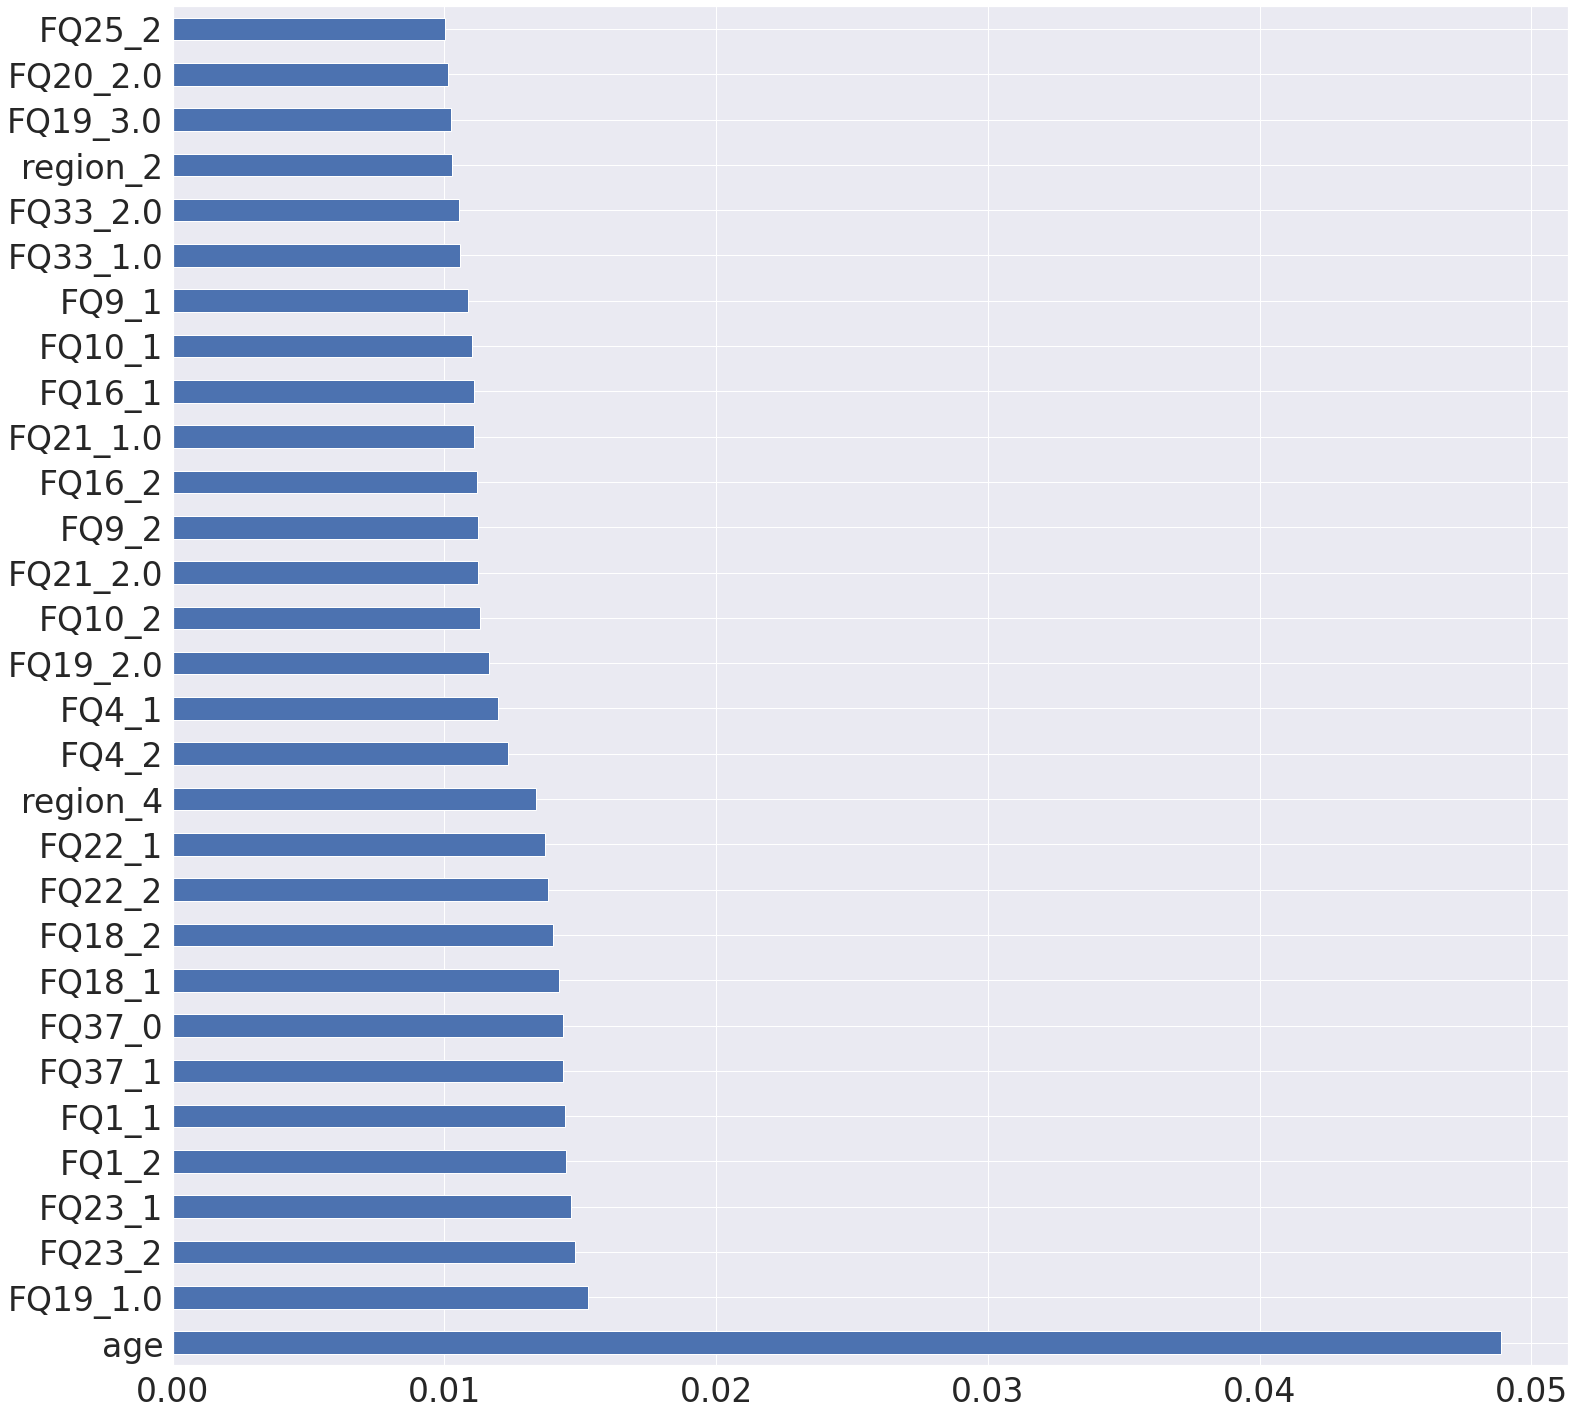

In [ ]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(25,25))
sns.set(font_scale = 3)
feature_importances.nlargest(30).plot(kind='barh')
plt.show() 

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split as tts

In [ ]:
X_train,X_test,y_train,y_test=tts(features,target,train_size=0.7,stratify=target)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Finding the optimal number of features to use**

accuracy 0.7254564455646401, f1_score 0.002457002457002457


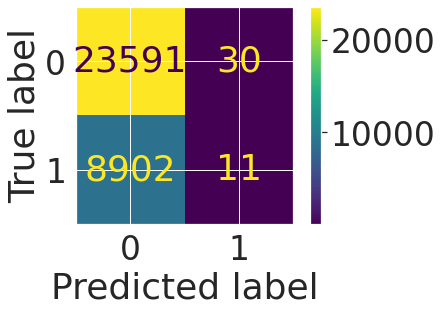

In [ ]:
#Finding the optimal number of features to use
model=RFC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
score = f1_score(y_test,y_predict)

accu = accuracy_score(y_test,y_predict)
print(f'accuracy {accu}, f1_score {score}')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [ ]:
model=RFC()
## Finding the optimal number of features to use in our model
values= [250,200,150,100,125,175,165,50,10]
for value in values:
  model.fit(X_train[feature_importances.iloc[:value].index],y_train)
  y_predict = model.predict(X_test[feature_importances.iloc[:value].index])
  score = f1_score(y_test,y_predict)

  accu = accuracy_score(y_test,y_predict)
  print(f'Number of features {value}')
  print(f'accuracy {accu}, f1_score {score}')

Number of features 250
accuracy 0.724011803036823, f1_score 0.00685764849021126
Number of features 200
accuracy 0.6954570603061413, f1_score 0.10915303003057003
Number of features 150
accuracy 0.6463084772853015, f1_score 0.22475240854274744
Number of features 100
accuracy 0.700006147415012, f1_score 0.10012907984510418
Number of features 125
accuracy 0.6923526157250876, f1_score 0.11900360883725025
Number of features 175
accuracy 0.6547919100018442, f1_score 0.19311732164667003
Number of features 165
accuracy 0.6372717772176799, f1_score 0.2318557573390614
Number of features 50
accuracy 0.7147599434437819, f1_score 0.047032244814130215
Number of features 10
accuracy 0.724042540111883, f1_score 0.008394079964656506


### The optimal number of columns after experimentation is 165 features
###                    with f1_score of 0.23

In [ ]:
feature_importances.iloc[:165].index

Index(['age', 'country_code_0', 'country_code_1', 'country_code_2',
       'country_code_3', 'country_code_4', 'country_code_5', 'country_code_6',
       'country_code_7', 'country_code_8',
       ...
       'FQ1_2', 'FQ1_3', 'FQ1_4', 'FQ2_1.0', 'FQ2_2.0', 'FQ2_3.0', 'FQ2_4.0',
       'FQ3_1.0', 'FQ3_2.0', 'FQ3_3.0'],
      dtype='object', length=165)